Task 1: A classification example: fetal heart condition diagnosis


Step 1. Reading the data

In [46]:
# In this step we start by reading the csv file unsing panda library 
import pandas as pd
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
data = pd.read_csv('/home/mol/Desktop/fetal_heart_diagnosis', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

Step 2. Training the baseline classifier

In [54]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [53]:
# checking the accurasy of the DummyClassifier by using cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xtrain, Ytrain)

/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.77992958, 0.77954145, 0.78230088])

the most frequent label clf from the dummyClassifier is none

Step 3. Trying out some different classifiers

-------Model 1: DecisionTreeClassifier------------

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples.

In [48]:
# trying the DecisionTreeClassifier to compare it with the DummyClassifier
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
#checking the accurasy of the DecisionTreeClassifier by using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf1, Xtrain, Ytrain)

/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.9278169 , 0.93650794, 0.93097345])

In [ ]:
-------Model 2: RandomForestClassifier------------

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
#checking the accurasy of the RandomForestClassifier by using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf2, Xtrain, Ytrain)

/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.93133803, 0.92416226, 0.94513274])

-------Model 3: LogisticRegression------------

Logistic Regression (aka logit, MaxEnt) classifier.
This class implements regularized logistic regression using the ‘liblinear’ library,‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. Note that regularization is applied by default. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

In [57]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
clf3

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
#checking the accurasy of the LogisticRegression Classifier by using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf3, Xtrain, Ytrain)

/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/

array([0.89964789, 0.88183422, 0.8920354 ])

-------Model 4: LinearSVC------------

Linear Support Vector Classification.

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

In [62]:
from sklearn.svm import LinearSVC
clf4 = LinearSVC()
clf4

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [63]:
#checking the accurasy of the LinearSVC Classifier by using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf4, Xtrain, Ytrain)

/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.84330986, 0.85537919, 0.84424779])

Step 4. Final evaluation

In [61]:
# Evaluate the accuracy of the differnt classifiers using the accuracy_score method 
from sklearn.metrics import accuracy_score
# For dummy classifier 
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print('DummyClassifier: ',accuracy_score(Ytest, Yguess))

# For decision tree classifier 
clf1.fit(Xtrain, Ytrain)
Yguess = clf1.predict(Xtest)
print('DecisionTreeClassifier: ', accuracy_score(Ytest, Yguess))

# For RandomForestClassifier
clf2.fit(Xtrain, Ytrain)
Yguess = clf2.predict(Xtest)
print('RandomForestClassifier: ', accuracy_score(Ytest, Yguess))
# For LogisticRegression classifier 
clf3.fit(Xtrain, Ytrain)
Yguess = clf3.predict(Xtest)
print('LogisticRegression: ', accuracy_score(Ytest, Yguess))
# For LinearSVC classifier 
clf4.fit(Xtrain, Ytrain)
Yguess = clf4.predict(Xtest)
print('DecisionTreeClassifier: ', accuracy_score(Ytest, Yguess))

DummyClassifier:  0.7699530516431925
DecisionTreeClassifier:  0.903755868544601
RandomForestClassifier:  0.9248826291079812


/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression:  0.8802816901408451
DecisionTreeClassifier:  0.8568075117370892


/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Summary:
We observe that the RandomForestClassifier is more accurate than the other classifiers. In addition, We observe that the DummyClassifier is the least accurate classifier.

Task 2: Decision trees for classification

Model 1: Decision Tree Classifier:
Let's try by tune the hyperparameter value max_dept=2,5&6
cls = TreeClassifier(max_depth=2)
cls.fit(X2, Y)
cls.draw_tree()


from sklearn.model_selection import cross_validate
#Cross-validation performance for the hyperparameter max_dept=2
cross_validate(cls, X2, Y, cv=5, scoring='accuracy')
Cross-validation performance = 0.96
#Cross-validation performance for the hyperparameter max_dept=5
cross_validate(cls, X2, Y, cv=5, scoring='accuracy')
Cross-validation performance 0.9866666666666667
#Cross-validation performance for the hyperparameter max_dept=6
cross_validate(cls, X2, Y, cv=5, scoring='accuracy')
Cross-validation performance = 0.9933333333333333

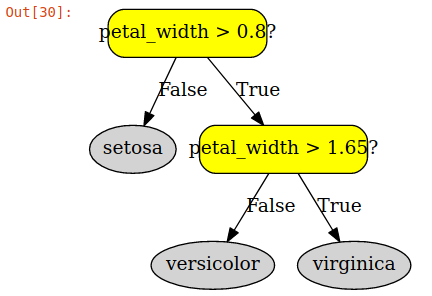

In [7]:
# The result when the max depth 2
from IPython.display import Image
Image(filename = '/home/mol/Downloads/md2.png', width=400,height=400)

Summary:(We worked on the lecture1 and we didn't include the code here, simply we are trying to descuss what we have found after tunning the hyperparameter called max_depth)
After some iteration by tunning the hyperparameter max_depth, the best cross-validation performance -----
We tried different hyperparameter value and we have got the maximum cross validation performance on max_depth=5. The score is 0.9933333333333333
But, after that the tree terminal to draw more trees or leafs.The best value is at max_depth= 6.

Task 3: A regression example: predicting apartment prices

In [10]:
# Read the CSV file using Pandas.
import numpy as np
alldata = pd.read_csv('/home/mol/Desktop/sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

------Model 0: DummyRegressor -------------

DummyRegressor is a regressor that makes predictions using simple rules.This regressor is useful as a simple baseline to compare with other (real) regressors.

In [11]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m0 = DummyRegressor()
cross_validate(m0, Xtrain, Ytrain, scoring='neg_mean_squared_error')

/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([0.00421071, 0.0021894 , 0.00207138]),
 'score_time': array([0.00089073, 0.00049448, 0.00049019]),
 'test_score': array([-0.38972617, -0.38044084, -0.39782973])}

------Model 1: LinearRegression -------------

In [ ]:
LinearRegression uses ordinary least squares Linear Regression.

In [12]:
# Using the LinearRegression model which is a model tried to fits linear model for the data set given and minimize the mean 
# square error and checking the accuracy by using the mean square error
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')


/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([0.24237442, 0.00597334, 0.00593472]),
 'score_time': array([0.00238013, 0.00219512, 0.00201893]),
 'test_score': array([-0.30339913, -0.32528465, -0.29166641])}

------Model 2: DecisionTreeRegressor -------------

DecisionTreeRegressor class can be applied to regression problems.
As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values.

In [24]:
from sklearn.tree import DecisionTreeRegressor
m2 = DecisionTreeRegressor()
cross_validate(m2, Xtrain, Ytrain, scoring='neg_mean_squared_error')
from sklearn.metrics import mean_squared_error

# we calculate the mean square error for the prediction model m2 DecisionTreeRegressor
m2.fit(Xtrain, Ytrain)
print('DecisionTreeRegressor :',mean_squared_error(Ytest, m2.predict(Xtest)))

/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeRegressor : 0.5656477143479373


------Model 3: RandomForestRegressor -------------

A random forest is a meta estimator that fits a number of classifical decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [14]:
from sklearn.ensemble import RandomForestRegressor
m3 = RandomForestRegressor()
cross_validate(m3, Xtrain, Ytrain, scoring='neg_mean_squared_error')


/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'fit_time': array([0.3484931 , 0.30019999, 0.32191491]),
 'score_time': array([0.01327395, 0.01341915, 0.01449561]),
 'test_score': array([-0.32400393, -0.30370024, -0.30771819])}

------Model 4: MLPRegressor ----------------

MLPRegressor is a multi-layer perceptron regression system within sklearn.neural_network. This model optimizes the squared-loss using LBFGS or stochastic gradientdescent.

In [15]:
from sklearn.neural_network import MLPRegressor
m4 = MLPRegressor()
cross_validate(m4, Xtrain, Ytrain, scoring='neg_mean_squared_error')


/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([3.61504555, 1.74389172, 0.7901535 ]),
 'score_time': array([0.00508332, 0.00510955, 0.00535798]),
 'test_score': array([-6.0844622e+01, -1.1118143e+02, -1.2701155e+05])}

------Model 5: Ridge -------------

Linear least squares with l2 regularization. It uses minimizes the objective function.
This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression.

In [28]:
from sklearn.linear_model import Ridge
m5 = Ridge()
cross_validate(m5, Xtrain, Ytrain, scoring='neg_mean_squared_error')

/home/mol/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([0.0077951 , 0.00618029, 0.00687099]),
 'score_time': array([0.00248384, 0.00281858, 0.00351977]),
 'test_score': array([-0.30339987, -0.32527913, -0.29166665])}

Train on the full training set and evaluate on the held-out test set.

In [31]:
from sklearn.metrics import mean_squared_error
# we calculate the mean square error for the prediction model m1 DummyRegressor
m0.fit(Xtrain, Ytrain)
print('DummyRegressor :',mean_squared_error(Ytest, m0.predict(Xtest)))

# we calculate the mean square error for the prediction model m1 LinearRegression
m1.fit(Xtrain, Ytrain)
print('LinearRegression :',mean_squared_error(Ytest, m1.predict(Xtest)))

# we calculate the mean square error for the prediction model m2 DecisionTreeRegressor
m2.fit(Xtrain, Ytrain)
print('DecisionTreeRegressor :',mean_squared_error(Ytest, m2.predict(Xtest)))

# we calculate the mean square error for the prediction model m3 RandomForestRegressor
m3.fit(Xtrain, Ytrain)
print('RandomForestRegressor :',mean_squared_error(Ytest, m3.predict(Xtest)))
# we calculate the mean square error for the prediction model m4 MLPRegressor
m4.fit(Xtrain, Ytrain)
print('MLPRegressor :',mean_squared_error(Ytest, m4.predict(Xtest)))
      
# we calculate the mean square error for the prediction model m5 Ridge
m5.fit(Xtrain, Ytrain)
print('Ridge :',mean_squared_error(Ytest, m5.predict(Xtest)))

DummyRegressor : 0.4028398414133475
LinearRegression : 0.3155890397003744
DecisionTreeRegressor : 0.5663592218094469
RandomForestRegressor : 0.32760016324439795
MLPRegressor : 290.97467663215366
Ridge : 0.3155902354580929
